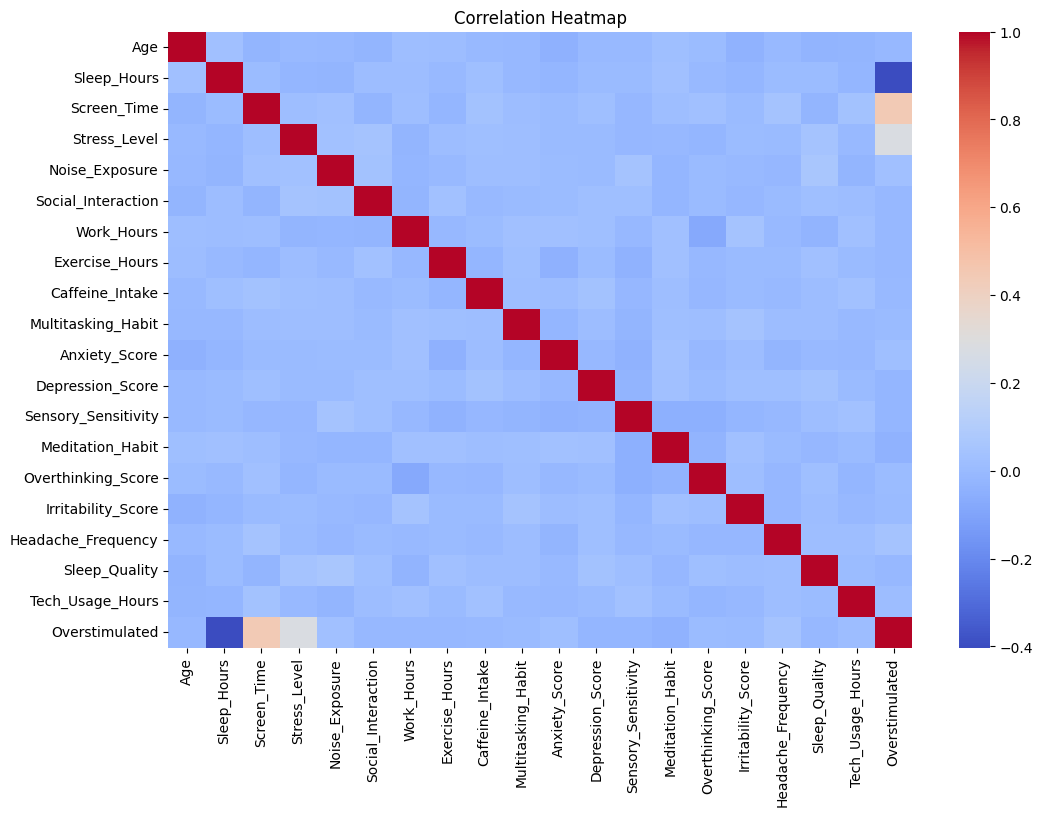

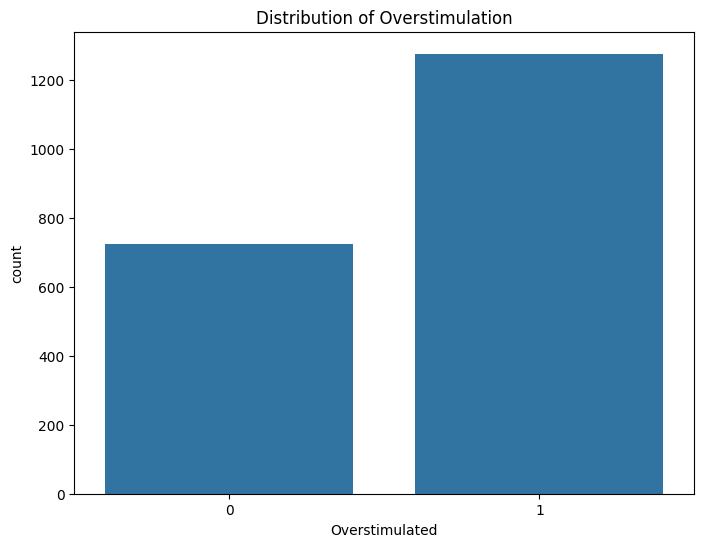

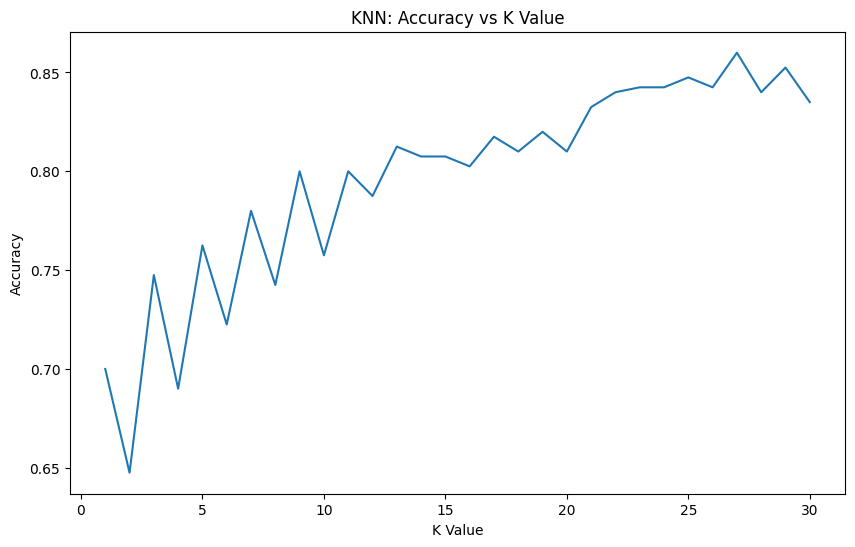

Optimal k value: 27

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.81      0.80       137
           1       0.90      0.89      0.89       263

    accuracy                           0.86       400
   macro avg       0.84      0.85      0.85       400
weighted avg       0.86      0.86      0.86       400


Confusion Matrix:
[[111  26]
 [ 30 233]]

Prediction for example input:
Overstimulated: True
Probability: 0.78


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Read the data from CSV file
df = pd.read_csv('overstimulation_dataset.csv')

# 1. Data Exploration and Visualization
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Overstimulated', data=df)
plt.title('Distribution of Overstimulation')
plt.show()

# 2. Feature Engineering
# Create new features
df['Sleep_Quality_Ratio'] = df['Sleep_Hours'] / df['Sleep_Quality']
df['Tech_Stress'] = df['Screen_Time'] * df['Stress_Level']
df['Work_Life_Balance'] = df['Work_Hours'] / (df['Social_Interaction'] + 1)  # Add 1 to avoid division by zero

# Select features for the model
features = ['Age', 'Sleep_Hours', 'Screen_Time', 'Stress_Level', 'Noise_Exposure',
            'Social_Interaction', 'Work_Hours', 'Exercise_Hours', 'Caffeine_Intake',
            'Multitasking_Habit', 'Anxiety_Score', 'Depression_Score', 'Sensory_Sensitivity',
            'Meditation_Habit', 'Overthinking_Score', 'Irritability_Score',
            'Headache_Frequency', 'Sleep_Quality', 'Tech_Usage_Hours',
            'Sleep_Quality_Ratio', 'Tech_Stress', 'Work_Life_Balance']

X = df[features]
y = df['Overstimulated']

# 3. Data Preprocessing
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. KNN Model
# Find optimal k value
k_values = range(1, 31)
scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

# Plot k values vs accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, scores)
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.title('KNN: Accuracy vs K Value')
plt.show()

# Use the best k value
optimal_k = k_values[np.argmax(scores)]
print(f"Optimal k value: {optimal_k}")

# Train final model
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train_scaled, y_train)

# 5. Model Evaluation
y_pred = knn.predict(X_test_scaled)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# 6. Prediction Function
def predict_overstimulation(input_data):
    """
    Input should be a dictionary with all features used in the model
    Example input:
    input_data = {
        'Age': 35,
        'Sleep_Hours': 7.5,
        'Screen_Time': 6.0,
        'Stress_Level': 5,
        'Noise_Exposure': 2,
        'Social_Interaction': 6,
        'Work_Hours': 8,
        'Exercise_Hours': 1.5,
        'Caffeine_Intake': 2,
        'Multitasking_Habit': 1,
        'Anxiety_Score': 4,
        'Depression_Score': 3,
        'Sensory_Sensitivity': 2,
        'Meditation_Habit': 0,
        'Overthinking_Score': 5,
        'Irritability_Score': 4,
        'Headache_Frequency': 2,
        'Sleep_Quality': 3,
        'Tech_Usage_Hours': 7.0
    }
    """
    # Create derived features
    input_df = pd.DataFrame([input_data])
    input_df['Sleep_Quality_Ratio'] = input_df['Sleep_Hours'] / input_df['Sleep_Quality']
    input_df['Tech_Stress'] = input_df['Screen_Time'] * input_df['Stress_Level']
    input_df['Work_Life_Balance'] = input_df['Work_Hours'] / (input_df['Social_Interaction'] + 1)

    # Scale the input
    input_scaled = scaler.transform(input_df[features])

    # Make prediction
    prediction = knn.predict(input_scaled)
    probability = knn.predict_proba(input_scaled)

    return {
        'Overstimulated': bool(prediction[0]),
        'Probability': float(max(probability[0]))
    }

# Example usage
example_input = {
    'Age': 35,
    'Sleep_Hours': 2,
    'Screen_Time': 6.0,
    'Stress_Level': 5,
    'Noise_Exposure': 2,
    'Social_Interaction': 6,
    'Work_Hours': 15,
    'Exercise_Hours': 1.5,
    'Caffeine_Intake': 2,
    'Multitasking_Habit': 1,
    'Anxiety_Score': 4,
    'Depression_Score': 0,
    'Sensory_Sensitivity': 2,
    'Meditation_Habit': 0,
    'Overthinking_Score': 5,
    'Irritability_Score': 4,
    'Headache_Frequency': 2,
    'Sleep_Quality': 3,
    'Tech_Usage_Hours': 7.0
}

result = predict_overstimulation(example_input)
print("\nPrediction for example input:")
print(f"Overstimulated: {result['Overstimulated']}")
print(f"Probability: {result['Probability']:.2f}")